<a href="https://colab.research.google.com/github/bekingcn/colab-archive/blob/main/Copy_of_postgres_openai_vanna_vannadb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating SQL for Postgres using OpenAI via Vanna.AI (Recommended), Vanna Hosted Vector DB (Recommended)
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../postgres-openai-standard-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-azure-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-anthropic-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Anthropic</div>
        <small class="w-full">Use Anthropics Claude with your Anthropic API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-gemini-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Google Gemini</div>
        <small class="w-full">Use Google Gemini with your Gemini or Vertex API Key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-mistral-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-other-llm-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../postgres-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-standard-qdrant/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Qdrant</div>
        <small class="w-full">Use Qdrants open-source vector database</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-standard-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../postgres-openai-standard-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
%pip install 'vanna[postgres]'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
  Created wheel for flasgger: filename=flasgger-0.9.7.1-py2.py3-none-any.whl size=3865181 sha256=2a543e46aeca5ec617f501edf8dae8b6fce2c3a54e2de148d8935b8326fa4d9d
  Stored in directory: /root/.cache/pip/wheels/92/c0/ec/a7935834b3205c0c0acbd4ba52b9c8215835984fe168374262
Successfully built flasgger


In [2]:
import vanna
from vanna.remote import VannaDefault

In [8]:
api_key = '1606b025f810485ca7d4d06bba906757' # Your API key from https://vanna.ai/account/profile

vanna_model_name = 'yiyong-model-2' # Your model name from https://vanna.ai/account/profile
vn = VannaDefault(model=vanna_model_name, api_key=api_key, config={})



<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which database do you want to query?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Postgres</div>
        <small class="w-full"></small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../mssql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Microsoft SQL Server</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../mysql-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">MySQL</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../duckdb-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">DuckDB</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../snowflake-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Snowflake</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../bigquery-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">BigQuery</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">SQLite</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../oracle-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Oracle</div>
        <small class="w-full"></small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../other-database-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other Database</div>
        <small class="w-full">Use Vanna to generate queries for any SQL database</small>
      </div>
    </a>
  </li>
    
</ul>
    

In [9]:
vn.connect_to_sqlite('northwind.db')

## Training
You only need to train once. Do not train again unless you want to add more training data.

In [ ]:

# The information schema query may need some tweaking depending on your database. This is a good starting point.
df_information_schema = vn.run_sql("SELECT * FROM INFORMATION_SCHEMA.COLUMNS")

# This will break up the information schema into bite-sized chunks that can be referenced by the LLM
plan = vn.get_training_plan_generic(df_information_schema)
plan

# If you like the plan, then uncomment this and run it to train
# vn.train(plan=plan)



In [10]:

df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null and type ='table'")

for ddl in df_ddl['sql'].to_list():
  vn.train(ddl=ddl)

Adding ddl: CREATE TABLE [Categories]
(      [CategoryID] INTEGER PRIMARY KEY AUTOINCREMENT,
       [CategoryName] TEXT,
       [Description] TEXT,
       [Picture] BLOB
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE [CustomerCustomerDemo](
   [CustomerID]TEXT NOT NULL,
   [CustomerTypeID]TEXT NOT NULL,
   PRIMARY KEY ("CustomerID","CustomerTypeID"),
   FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION,
	FOREIGN KEY ([CustomerTypeID]) REFERENCES [CustomerDemographics] ([CustomerTypeID]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE [CustomerDemographics](
   [CustomerTypeID]TEXT NOT NULL,
   [CustomerDesc]TEXT,
    PRIMARY KEY ("CustomerTypeID")
)
Adding ddl: CREATE TABLE [Customers]
(      [CustomerID] TEXT,
       [CompanyName] TEXT,
       [ContactName] TEXT,
       [ContactTitle] TEXT,
       [Address] TEXT,
       [City] TEXT,
       [Region] TEXT,
       [PostalCode] T

In [ ]:

# The following are methods for adding training data. Make sure you modify the examples to match your database.

# DDL statements are powerful because they specify table names, colume names, types, and potentially relationships
vn.train(ddl="""
    CREATE TABLE IF NOT EXISTS my-table (
        id INT PRIMARY KEY,
        name VARCHAR(100),
        age INT
    )
""")

# Sometimes you may want to add documentation about your business terminology or definitions.
vn.train(documentation="Our business defines OTIF score as the percentage of orders that are delivered on time and in full")

# You can also add SQL queries to your training data. This is useful if you have some queries already laying around. You can just copy and paste those from your editor to begin generating new SQL.
vn.train(sql="SELECT * FROM my-table WHERE name = 'John Doe'")


In [11]:
# At any time you can inspect what training data the package is able to reference
training_data = vn.get_training_data()
training_data

,id,training_data_type,question,content
0,284740-ddl,ddl,NaN,CREATE TABLE [EmployeeTerritories](\n [Emplo...
1,284746-ddl,ddl,NaN,CREATE TABLE [Suppliers](\n [SupplierID]INTE...
2,284734-ddl,ddl,NaN,CREATE TABLE [Categories]\n( [CategoryID]...
3,284742-ddl,ddl,NaN,CREATE TABLE [Orders](\n [OrderID]INTEGER NO...
4,284745-ddl,ddl,NaN,CREATE TABLE [Shippers](\n [ShipperID]INTEGE...
5,284736-ddl,ddl,NaN,CREATE TABLE [CustomerCustomerDemo](\n [Cust...
6,284739-ddl,ddl,NaN,CREATE TABLE [Employees]\n( [EmployeeID] ...
7,284747-ddl,ddl,NaN,CREATE TABLE [Territories](\n [TerritoryID]T...
8,284735-ddl,ddl,NaN,"CREATE TABLE sqlite_sequence(name,seq)"
9,284744-ddl,ddl,NaN,CREATE TABLE [Regions](\n [RegionID]INTEGER ...


In [ ]:
# You can remove training data if there's obsolete/incorrect information.
vn.remove_training_data(id='1-ddl')


## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Order Details](\n   [OrderID]INTEGER NOT NULL,\n   [ProductID]INTEGER NOT NULL,\n   [UnitPrice]NUMERIC NOT NULL DEFAULT 0,\n   [Quantity]INTEGER NOT NULL DEFAULT 1,\n   [Discount]REAL NOT NULL DEFAULT 0,\n    PRIMARY KEY ("OrderID","ProductID"),\n    CHECK ([Discount]>=(0) AND [Discount]<=(1)),\n    CHECK ([Quantity]>(0)),\n    CHECK ([UnitPrice]>=(0)),\n\tFOREIGN KEY ([OrderID]) REFERENCES [Orders] ([OrderID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n\tFOREIGN KEY ([ProductID]) REFERENCES [Products] ([ProductID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Orders](\n   [OrderID]INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,\n   [CustomerID]TEXT,\n   [EmployeeID]INTEGER,\n   [OrderDate]DATETI

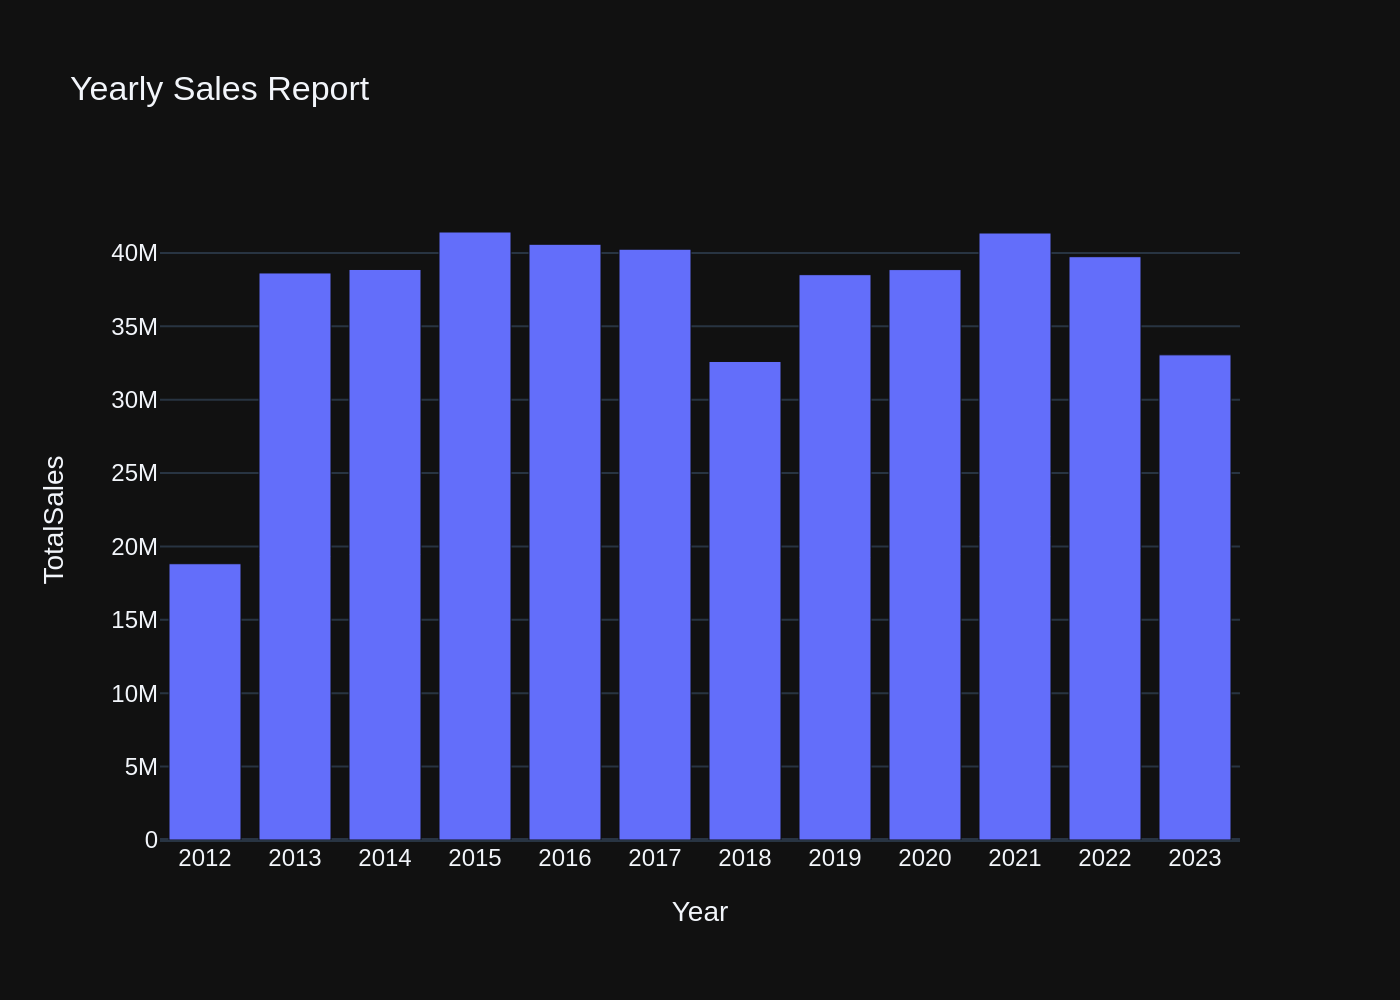

("SELECT strftime('%Y', OrderDate) AS Year, \n       SUM(UnitPrice * Quantity) * (1 - Discount) AS TotalSales\nFROM Orders\nJOIN [Order Details] ON Orders.OrderID = [Order Details].OrderID\nGROUP BY Year\n",
     Year    TotalSales
 0   2012  1.882320e+07
 1   2013  3.863312e+07
 2   2014  3.887015e+07
 3   2015  4.142346e+07
 4   2016  4.058689e+07
 5   2017  4.025121e+07
 6   2018  3.260241e+07
 7   2019  3.851696e+07
 8   2020  3.886244e+07
 9   2021  4.135555e+07
 10  2022  3.974207e+07
 11  2023  3.305449e+07,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Year=%{x}<br>TotalSales=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['2012', '2013'

In [13]:
vn.ask(question="show me the yearly sales report from order details")

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Customers]\n(      [CustomerID] TEXT,\n       [CompanyName] TEXT,\n       [ContactName] TEXT,\n       [ContactTitle] TEXT,\n       [Address] TEXT,\n       [City] TEXT,\n       [Region] TEXT,\n       [PostalCode] TEXT,\n       [Country] TEXT,\n       [Phone] TEXT,\n       [Fax] TEXT,\n       PRIMARY KEY (`CustomerID`)\n)\n\nCREATE TABLE [CustomerDemographics](\n   [CustomerTypeID]TEXT NOT NULL,\n   [CustomerDesc]TEXT,\n    PRIMARY KEY ("CustomerTypeID")\n)\n\nCREATE TABLE [CustomerCustomerDemo](\n   [CustomerID]TEXT NOT NULL,\n   [CustomerTypeID]TEXT NOT NULL,\n   PRIMARY KEY ("CustomerID","CustomerTypeID"),\n   FOREIGN KEY ([CustomerID]) REFERENCES [Customers] ([CustomerID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTI

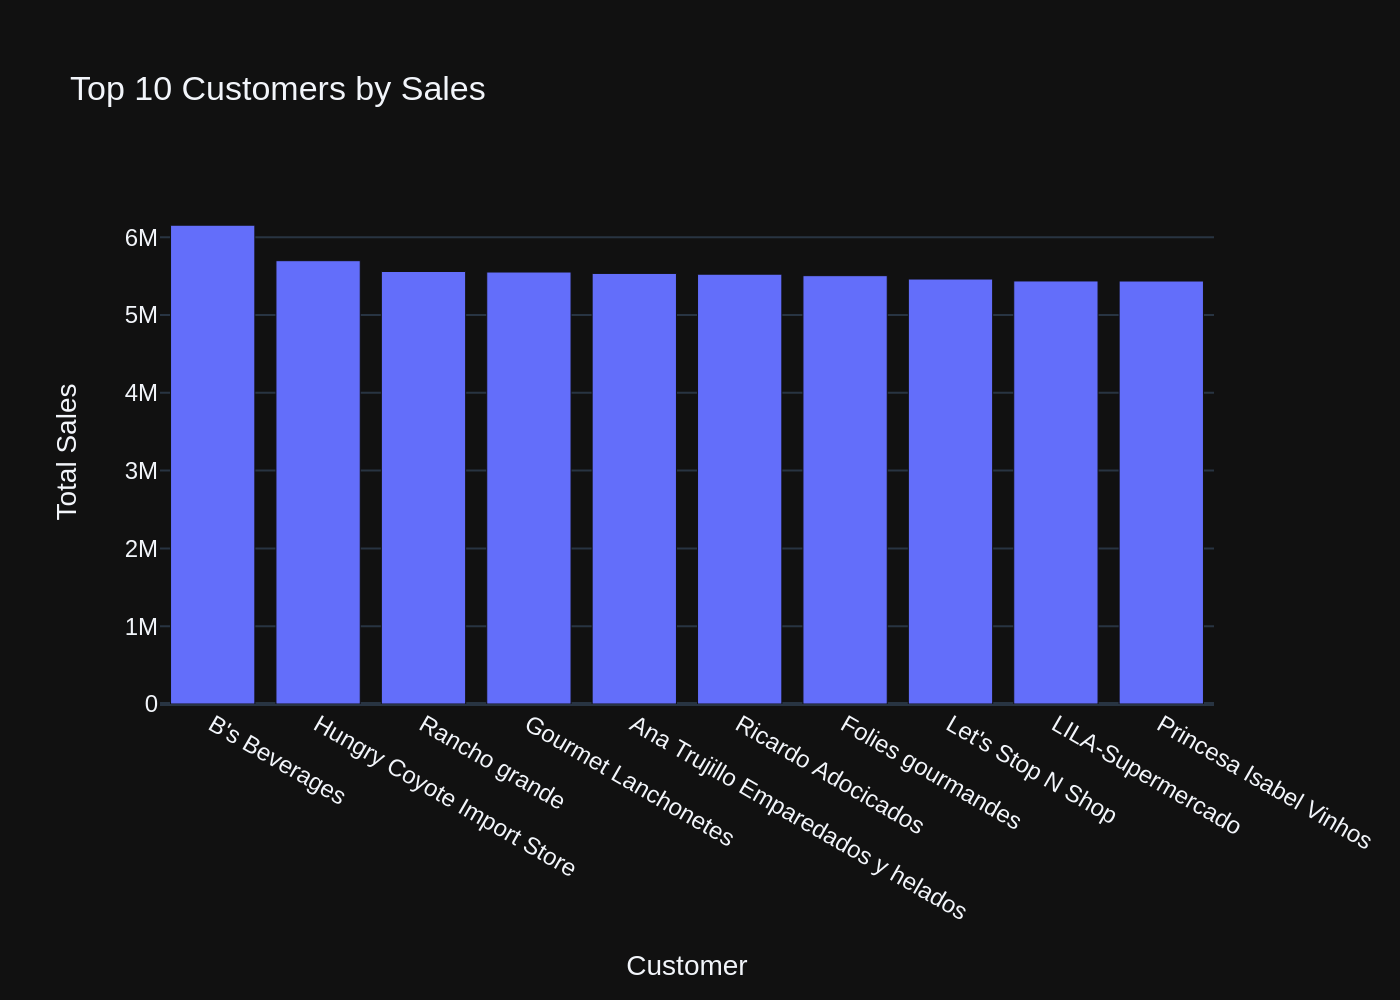

('SELECT c.CustomerID, c.CompanyName, SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales\nFROM Customers c\nJOIN Orders o ON c.CustomerID = o.CustomerID\nJOIN [Order Details] od ON o.OrderID = od.OrderID\nGROUP BY c.CustomerID, c.CompanyName\nORDER BY TotalSales DESC\nLIMIT 10;',
   CustomerID                         CompanyName    TotalSales
 0      BSBEV                       B's Beverages  6.154115e+06
 1      HUNGC          Hungry Coyote Import Store  5.698024e+06
 2      RANCH                       Rancho grande  5.559110e+06
 3      GOURL                 Gourmet Lanchonetes  5.552310e+06
 4      ANATR  Ana Trujillo Emparedados y helados  5.534357e+06
 5      RICAR                  Ricardo Adocicados  5.524517e+06
 6      FOLIG                   Folies gourmandes  5.505503e+06
 7      LETSS                   Let's Stop N Shop  5.462198e+06
 8      LILAS                   LILA-Supermercado  5.437438e+06
 9      PRINI              Princesa Isabel Vinhos  5.436771e+06,

In [14]:
vn.ask(question="show me the top 10 customers by sales")

In [17]:
vn.ask(question="show me the sales by product category in order details")

SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Order Details](\n   [OrderID]INTEGER NOT NULL,\n   [ProductID]INTEGER NOT NULL,\n   [UnitPrice]NUMERIC NOT NULL DEFAULT 0,\n   [Quantity]INTEGER NOT NULL DEFAULT 1,\n   [Discount]REAL NOT NULL DEFAULT 0,\n    PRIMARY KEY ("OrderID","ProductID"),\n    CHECK ([Discount]>=(0) AND [Discount]<=(1)),\n    CHECK ([Quantity]>(0)),\n    CHECK ([UnitPrice]>=(0)),\n\tFOREIGN KEY ([OrderID]) REFERENCES [Orders] ([OrderID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\n\tFOREIGN KEY ([ProductID]) REFERENCES [Products] ([ProductID]) \n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\n)\n\nCREATE TABLE [Products](\n   [ProductID]INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,\n   [ProductName]TEXT NOT NULL,\n   [SupplierID]INTEGER,\n   [Ca

## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

In [18]:
from vanna.flask import VannaFlaskApp
app = VannaFlaskApp(vn)
app.run()

Google Colab doesn't support running websocket servers. Disabling debug mode.


<IPython.core.display.Javascript object>

Your app is running at:
https://s11lc6nfdz7-496ff2e9c6d22116-8084-colab.googleusercontent.com/
 * Serving Flask app 'vanna.flask'
 * Debug mode: off
Info: None
None
SQL Prompt: [{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE [Categories]\n(      [CategoryID] INTEGER PRIMARY KEY AUTOINCREMENT,\n       [CategoryName] TEXT,\n       [Description] TEXT,\n       [Picture] BLOB\n)\n\nCREATE TABLE [Products](\n   [ProductID]INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT,\n   [ProductName]TEXT NOT NULL,\n   [SupplierID]INTEGER,\n   [CategoryID]INTEGER,\n   [QuantityPerUnit]TEXT,\n   [UnitPrice]NUMERIC DEFAULT 0,\n   [UnitsInStock]INTEGER DEFAULT 0,\n   [UnitsOnOrder]INTEGER DEFAULT 0,\n   [ReorderLevel]INTEGER DEFAULT 0,\n   [Discontinued]TEXT NOT NULL DEFAULT \'0\',\n    CHECK ([UnitPrice]

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
